# Python for Health - Stanford University Statistical Analysis and Machine Learning

For this project we're going to attempt a binary classification of the presence of heart disease.

Our goals for this project will be to introduce you to the process of working with data in Python, preparing a dataset, running statistical analyses, feature engineering, and finally training and testing a machine learning model.

Specifically you will be asked to classify whether a **patient is suffering from heart disease** based on a host of potential medical factors.

**DEFINITIONS**

**Binary Classification:** In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

**Supervised Learning:** This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed.

The dataset includes 14 columns. The information provided by each column is as follows:
- **age:** Age in years
- **sex:** (1 = male; 0 = female)
- **cp:** Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)
- **trestbps:** Resting blood pressure (in mm Hg on admission to the hospital)
- **cholserum:** Cholestoral in mg/dl
- **fbs** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeakST:** Depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)
- **ca:** Number of major vessels (0-4) colored by flourosopy
- **thal:** 1 = normal; 2 = fixed defect; 3 = reversable defect
- **sick:** Indicates the presence of Heart disease (True = Disease; False = No disease)

`sick` is the label that you will be predicting.

## Loading Essentials and Helper Functions

In [1]:
# Here are a set of libraries we imported to complete this assignment.
# Feel free to use these or equivalent libraries for your implementation
# and also add more import statements if any are missing.
# If you can run this cell without any errors, you're ready to go.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.

from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import os
import random

%matplotlib inline

random.seed(148)

## Part 1. Load the Data and Analyze

If you are running this in Google Colab you need to run the separate file import command first

In [2]:
from google.colab import files
df = files.upload()
df

Saving heartdisease.csv to heartdisease.csv


{'heartdisease.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,FALSE\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,FALSE\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,FALSE\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,FALSE\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,FALSE\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,FALSE\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,FALSE\n44,1,1,120,263,0,1,173,0,0,2,0,3,FALSE\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,FALSE\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,FALSE\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,FALSE\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,FALSE\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,FALSE\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,FALSE\n58,0,3,150,283,1,0,162,0,1,2,0,2,FALSE\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,FALSE\n58,0,2,120,340,0,1,172,0,0,2,0,2,FALSE\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,FALSE\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,FALSE\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,FALSE\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,FALSE\n44,1,2,130,233,0,1,179

Let's load our dataset so we can work with it (correct the path if your notebook is in a different directory than the .csv file).

In [3]:
df = pd.read_csv('heartdisease.csv')

### Question 1.1

Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the `head()`, `describe()`, and `info()` methods to display some of the rows so we can get a sense of the data.

In [4]:
# Your code here
# You may use separate cells if you'd like (one for `head`, one for `describe`, etc.)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Question 1.2
If you looked carefully, you might have noticed that in the data, all the `sick=False` values come before the `sick=True` values in the dataset. Why might this be problematic?

In [6]:
df['sick'].value_counts()

sick
False    165
True     138
Name: count, dtype: int64

### Question 1.3
Shuffle the rows in the dataframe so that the `sick=False` and `sick=True` values are randomly distributed in the dataframe.

In [7]:
from sklearn.utils import shuffle
df = shuffle(df)

In [8]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,True
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,True
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,True
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,True
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,False
82,60,0,2,102,318,0,1,160,0,0.0,2,1,2,False
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,False
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,False
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,False
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,True


### Question 1.4
Sometimes data will be stored in different formats (e.g., string, date, boolean), but many learning methods work strictly on numeric inputs. Call the info method to determine the datafield type for each column. Are there any that are problematic and why?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 174 to 87
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 33.4 KB


### Question 1.5
Determine if we're dealing with any null values. If so, report which columns.

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

### Question 1.6
Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean `sick` variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original `sick` datafield from the dataframe.

In [11]:
df['target'] = (df['sick']).astype(int)
del df['sick']

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,1
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,1
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,0


### Question 1.7
Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to get a feel of how each variable performs (for example, is it a binary, or limited selection, or does it follow a gradient)?

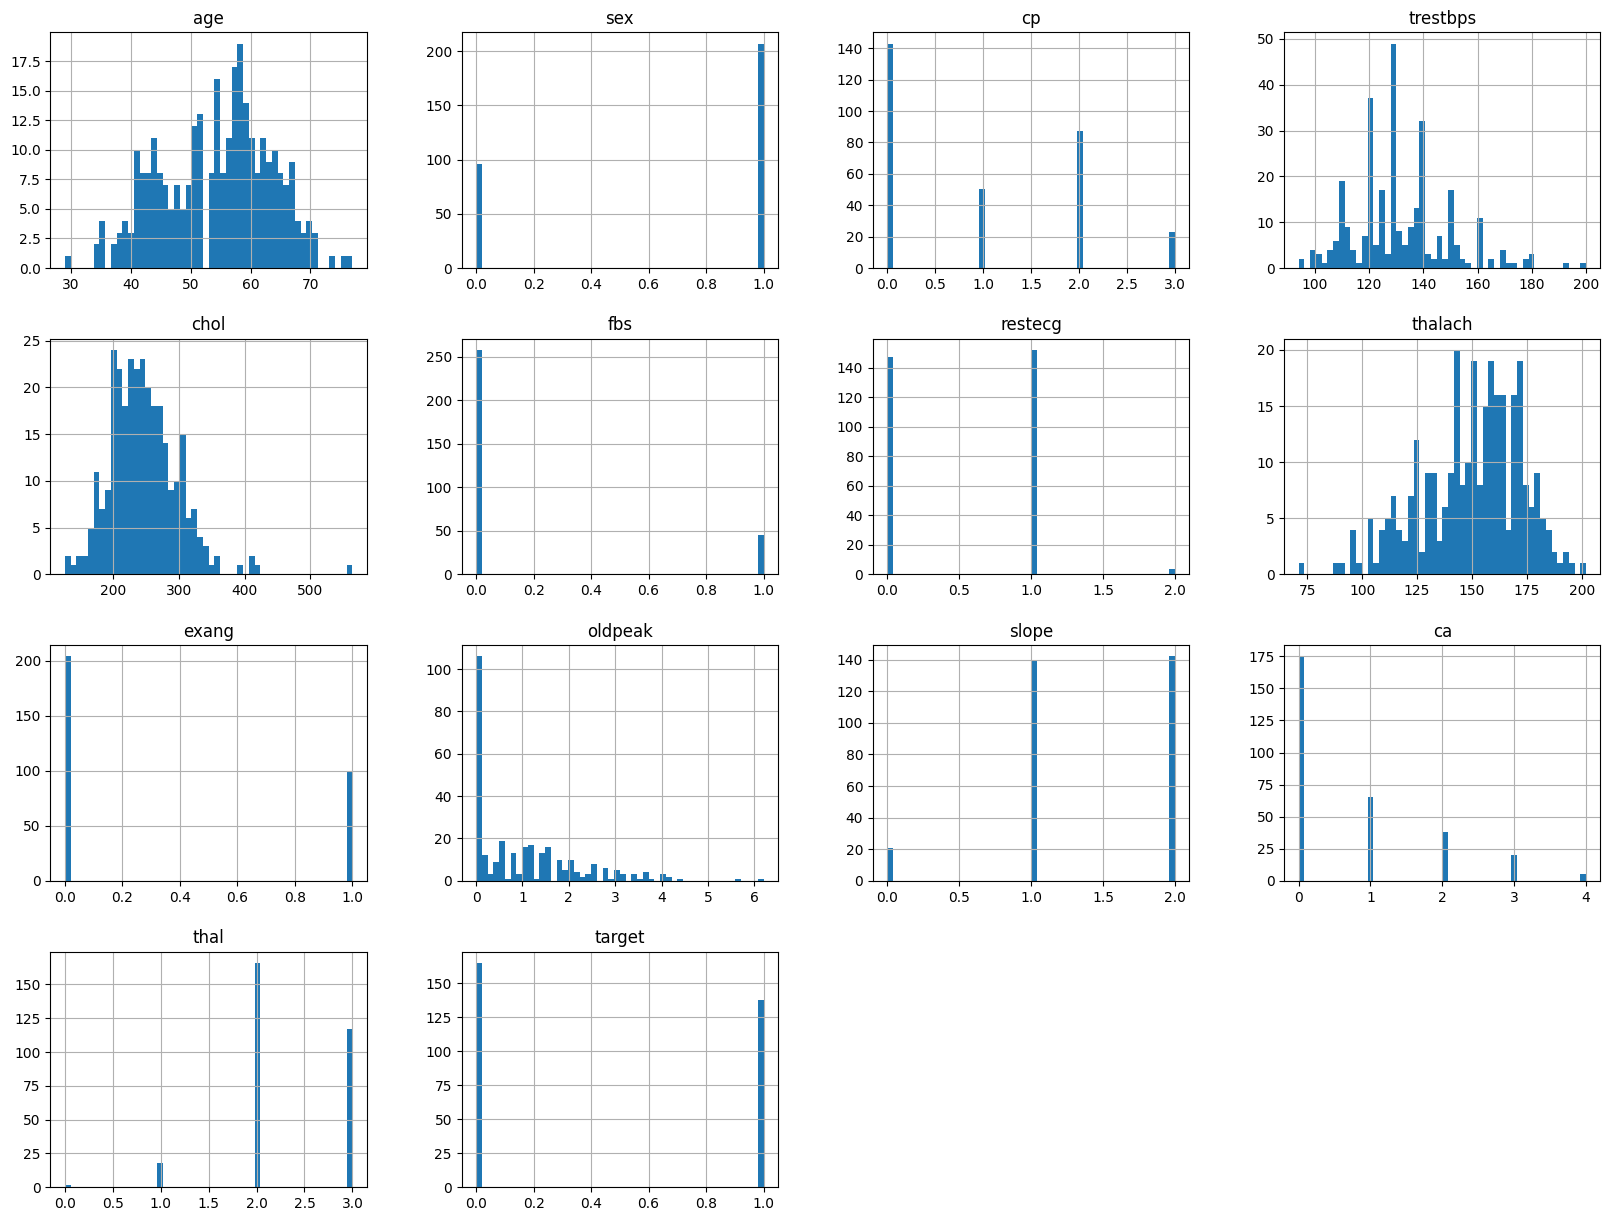

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Question 1.8
We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results.

In [14]:
df['target'].value_counts()

target
0    165
1    138
Name: count, dtype: int64

<Axes: >

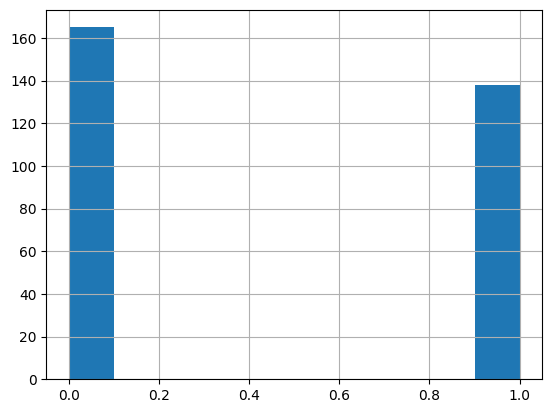

In [15]:
df['target'].hist()

### Question 1.9
Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

### Question 1.10
Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations (get some domain knowledge). Intuitively, why do you think some variables correlate more highly than others? Also discuss some pairs of variables that have very little correlation and why this might be the case for them.

Hint: one possible approach you can use the `sns.heatmap()` function to map the corr() method. Note: if your heatmap is not entirely visible, [this link](https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986) may be helpful in solving the issue.

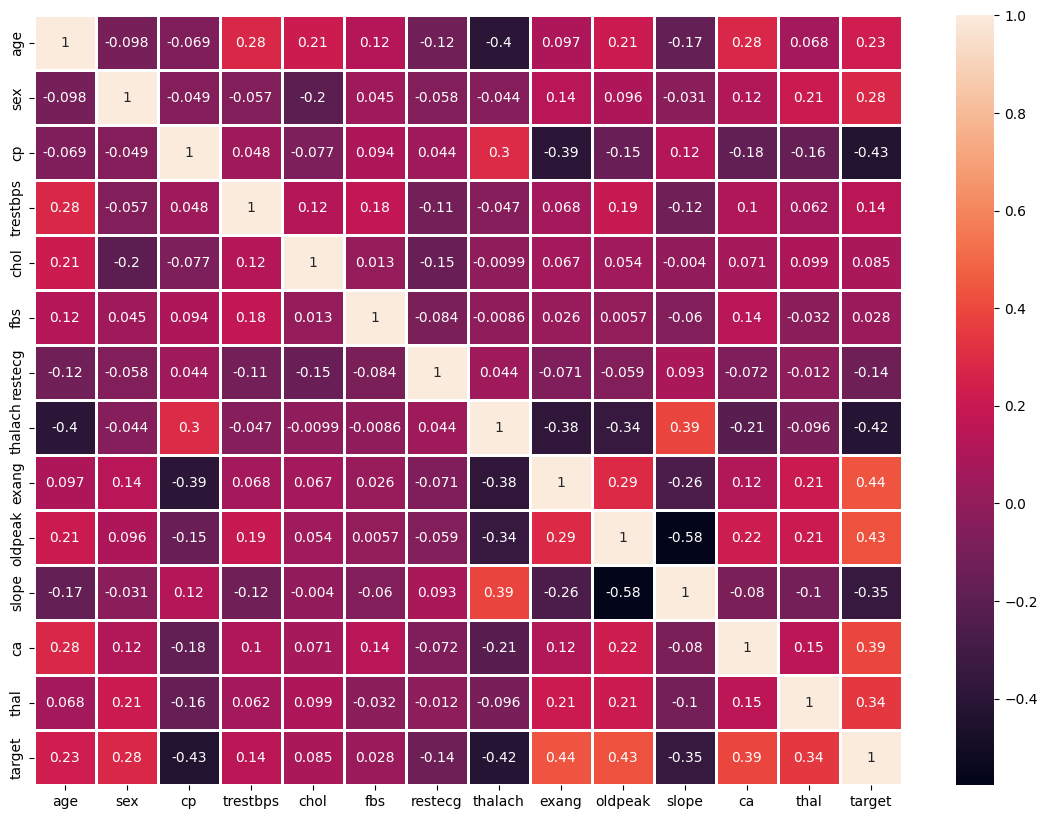

In [16]:
plt.figure(figsize=(14,10))
#sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
sns.heatmap(df.corr(),annot=True, linewidths=1)


plt.show()

[Discuss correlations here] E.g., We find the the strongest direct correlation between the presence of exercise induced angina (also a binary), and depression induced by exercise relative to rest indicates a strong direct correlation. Both of these are understandable as heart failure under conditions of duress is a clear indication of heart disease. Conversely, maximum heart rate achieved is inversely correlated, likely as a healthy heart is unable to achieve a high heart rate.

## Statistical Modeling

We're now ready to do some statistical modeling of our data!

In [17]:
target_stat = 'age'
data_stat = df[target_stat]
df_stat = df.drop([target_stat], axis=1)

In [18]:
import statsmodels.api as sm

In [19]:
sm_x = sm.add_constant(df_stat)

heart_stats = sm.OLS(data_stat, sm_x)

results_stats = heart_stats.fit()

In [20]:
print(results_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     9.869
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           4.36e-17
Time:                        17:44:27   Log-Likelihood:                -1042.3
No. Observations:                 303   AIC:                             2113.
Df Residuals:                     289   BIC:                             2165.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.2509      5.471     10.282      0.0

In [21]:

heart_stats_alt = sm.OLS(data_stat, df_stat)

results_stats_alt = heart_stats_alt.fit()

In [22]:
print(results_stats_alt.summary())

                                 OLS Regression Results                                
Dep. Variable:                    age   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              849.2
Date:                Thu, 25 Jul 2024   Prob (F-statistic):                   4.06e-222
Time:                        17:44:27   Log-Likelihood:                         -1089.5
No. Observations:                 303   AIC:                                      2205.
Df Residuals:                     290   BIC:                                      2253.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Part 2. Prepare the Data

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

### Question 2.1
Save the target column as a separate array and then drop it from the dataframe.

In [23]:
target_name = 'target'
data_target = df[target_name]
df = df.drop([target_name], axis=1)

### Question 2.2
Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 80% of your total dataframe (hint: use the `train_test_split` method). Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [24]:
train, test, target_train, target_test = train_test_split(df, data_target, test_size=0.2, random_state=0)

### Question 2.4
Now implement a pipeline of your choice to transform the data. You can opt to handle null values and categoricals however you wish, however please scale your numeric features using standard scaler. Refer to Project 1 for a example pipeline that you can mimic.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
heart_num = df.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1)


    # remove categorical features from the numeric values

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

numerical_features = list(heart_num)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features),
        ("cat", OneHotEncoder(categories='auto'), categorical_features),
    ])

heart_prepared = full_pipeline.fit_transform(train)

## Part 3. Additional Learning Methods
So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare results. Throughout this part, use the data that was produced by your pipeline earlier.

### Linear Decision Boundary Methods
We'll spend some time exploring logistic regression and SVM methods.

### Question 3.1 Logistic Regression
Let's now try a classifier, we introduced in lecture, one that's well known for handling linear models: logistic regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.  Implement a logistic regression classifier from `scikit-learn` on your data with the default settings. For both training and test data, report accuracy, precision, recall, and F1 score and plot a confusion matrix.

In [26]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [27]:
# Logistic Regression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(heart_prepared, target_train)



LogisticRegression(solver='liblinear')

In [28]:
# Pipeline my test data
heart_test = full_pipeline.transform(test)

#Generate predictions and score them!
predicted = log_reg.predict(heart_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))

Accuracy:    0.901639


### Question 3.2
Discuss what each measure (accuracy, precision, recall, and F1 score) is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.


In [29]:
from sklearn.metrics import confusion_matrix

# For all these you are comparing your newly created set of predicted labels with the real set of test labels
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test, predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted)))

Accuracy:    0.901639
Precision:   0.916667
Recall:      0.846154
F1 Score:    0.880000


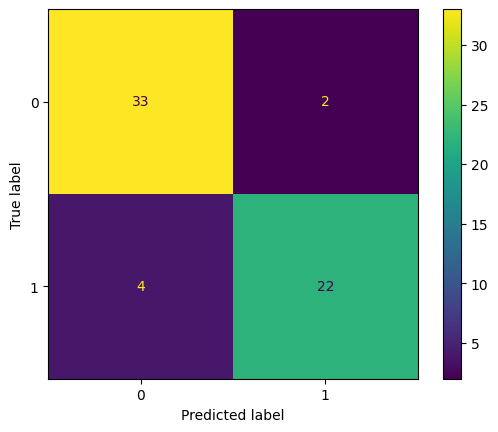

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(target_test, predicted, labels=log_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=log_reg.classes_)
disp.plot()
plt.show()

### Question 3.4
Describe what an ROC curve is and what your ROC graph output is showing.

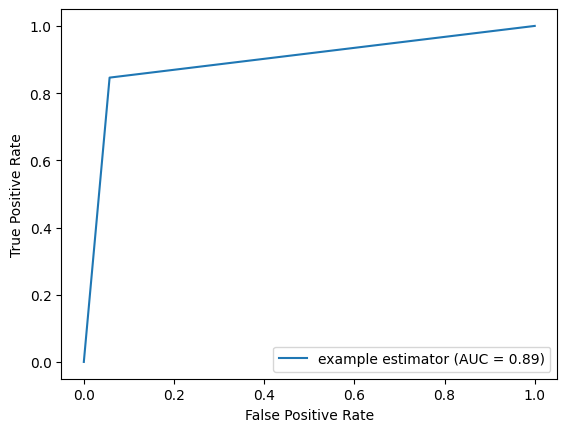

In [31]:

fpr, tpr, thresholds = metrics.roc_curve(target_test, predicted)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()
plt.show()